# Análise exploratória de textos

Sobre o que falam os documentos oficiais? 
Quais as palavras mais frequentes?
Este é um notebook para 
exploração inicial do texto dos documentos municipais.
Atualmente só mostra as palavras mais frequentes,
mas há outras análises interessantes.

O exemplo é com as Leis Municipais,
porém qualquer documento oficial pode ser carregado
para realizar a mesma análise.

### Algumas ideias para melhorar esse notebook:

- Separar os documentos por tópicos,
usando Latent Semantic Analysis (LSA) ou LDA, por exemplo,
e calcular a frequência de palavras pra cada tópico
- Separar entidades (nome de pessoas, ruas) das outras palavras
- Rodar o Part of Speech Tagging (POS Tagging) do Spacy
e calcular frequências para cada categoria
(substantivo, adjetivo, etc)

### Algumas referências para ideias e melhorias:

- [Como criar nuvem de palavras](https://medium.com/turing-talks/introdu%C3%A7%C3%A3o-ao-processamento-de-linguagem-natural-com-baco-exu-do-blues-17cbb7404258)
- [Explore 175 Years of Words in Scientific American](https://www.scientificamerican.com/article/explore-175-years-of-words-in-scientific-american/)
e
[How to Turn 175 Years of Words in Scientific American into an Image](https://www.scientificamerican.com/article/how-to-turn-175-years-of-words-in-scientific-american-into-an-image/)
- [Tutorial de visualização de informações textuais](https://infovis.fh-potsdam.de/tutorials/infovis5text.html)
- [Tutorial de análise exploratória de texto](https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a)
- [Análise dos tweets do congresso americano](https://congress.pudding.cool/)

## Pré-requisitos

Para rodar este notebook,
você precisa de um conjunto de textos (corpus).

Atualmente usamos o corpus das Leis Municipais,
presente no arquivo `leis.json`,
disponível [no Kaggle](https://www.kaggle.com/anapaulagomes/leis-do-municpio-de-feira-de-santana/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_laws = pd.read_json('leis.json')
city_laws.drop(['documento'], inplace=True, axis=1)
city_laws.describe()

,titulo,categoria,resumo,texto
count,6033,6033,6033,6033
unique,6033,8,4961,6029
top,"LEI Nº 705, de 09 de junho de 1971",Leis Ordinárias,DISPÕE SOBRE A CONCESSÃO DO TÍTULO DE CIDADÃO ...,Conteúdo obsoleto:\nEste Ato não tem mais efe...
freq,1,3367,153,3


In [3]:
city_laws

,titulo,categoria,resumo,texto
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
...,...,...,...,...
6028,RESOLUÇÃO Nº 125/1980,Resoluções,DISPÕE SOBRE A CONCESSÃO DE TÍTULO DE CIDADÃO ...,Faço saber que a Câmara Municipal aprovou e eu...
6029,RESOLUÇÃO Nº 403/2003,Resoluções,AUTORIZA A MESA DIRETIVA DO PODER LEGISLATIVO ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6030,RESOLUÇÃO Nº 492/2014,Resoluções,INSTITUI A SEGUNDA SEMANA DO MÊS DE AGOSTO EM ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6031,RESOLUÇÃO Nº 382/2001,Resoluções,CRIA A MEDALHA VEREADOR DIVAL FIGUEIREDO MACHA...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."


### Abaixo um exemplo de uma lei do munícipio

In [4]:
print(city_laws.iloc[len(city_laws)-1, 3])

A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:

Art. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:

"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.

§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."

"Art. 33 Compete, privativamente, ao Vice-Presidente:"

"Art. 36 ...

I - ...

e) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presidente.

II - ...



## Quais as palavras mais comuns?

A seguir, geramos uma visualização
das palavras mais comuns no texto das Leis.
Algo que pode ser desenvolvido em uma núvem de palavras.

A ideia é descobrir palavras chave recorrente nas Leis.
Sobre o que falam nossas Leis Municiapis?

In [5]:
import re
import nltk
import unicodedata
from nltk.corpus import stopwords


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/guiga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def clean_text(text):
    if not isinstance(text, str):
        raise ValueError(f"Esperava string, recebido {type(text)}")

    # Remove pontuação, dígitos e espaços em branco
    text = re.findall(r"[A-Za-zÀ-ú]+[-A-Za-zÀ-ú]*", text.lower())

    # Remove stopwords
    return [word for word in text if word not in stopwords.words("portuguese")]

In [7]:
text = ' '.join(city_laws['texto'].tolist())
text = clean_text(text)

unique_words_count = len(set(text))
print(f'Número de palavras únicas no texto: {unique_words_count}')

Número de palavras únicas no texto: 31958


## Removendo stopwords

Stopwords são palavras a serem removidas na etapa de
pré-processamento do texto. Em geral são palavras muito
comuns, utilizadas em quase todos os textos,
ou não possuem valor descritivo do que diz o texto.

Em ambos os casos, não possuem informação sobre o que trata
o texto, que é o que a gente quer visualizar com a
frequencia das palavras do texto.

O método `clean_text` já remove algumas stopwords
padrões do português, como preposições, artigos, etc:
("de", "a", "este").

Utilizamos o módulo Counter do Python para visualizar 
as palavras mais comuns nos textos das Leis
e decidir se elas possuem valor semântico ou não. 
Isto é, se descrevem o conteúdo do texto ou não.
As palavras que não possuirem,
incluímos na lista de stopwords, palavras a serem 
removidas.

In [8]:
from collections import Counter


counter_ = Counter(text)
counter_.most_common(100)

[('art', 30126),
 ('municipal', 27921),
 ('lei', 20410),
 ('r', 19890),
 ('rua', 17445),
 ('feira', 13996),
 ('santana', 12692),
 ('prefeito', 11447),
 ('d', 10347),
 ('n', 9408),
 ('câmara', 9151),
 ('município', 7269),
 ('data', 6655),
 ('publicação', 6418),
 ('seguinte', 6106),
 ('disposições', 5588),
 ('i', 5429),
 ('estado', 5420),
 ('bahia', 5334),
 ('vigor', 5222),
 ('ii', 5007),
 ('fica', 5000),
 ('contrário', 4860),
 ('entrará', 4589),
 ('revogadas', 4547),
 ('ver', 4513),
 ('artigo', 4474),
 ('secretário', 4395),
 ('ser', 4159),
 ('poder', 4048),
 ('decreto', 3904),
 ('projeto', 3877),
 ('saber', 3846),
 ('iii', 3798),
 ('faço', 3706),
 ('josé', 3694),
 ('parágrafo', 3670),
 ('executivo', 3594),
 ('gabinete', 3578),
 ('legislativo', 3569),
 ('através', 3486),
 ('silva', 3475),
 ('secretaria', 3464),
 ('único', 3453),
 ('sanciono', 3418),
 ('serviços', 3302),
 ('desta', 3187),
 ('despesas', 3031),
 ('presidente', 2978),
 ('v', 2898),
 ('prefeitura', 2842),
 ('autoria', 2763),


### Selecionando as stopwords

Palavras como:
'art' (artigo),
'municipal',
'lei',
'rua',
'feira',
'santana',
'prefeito',
'câmara',
'município',
'publicação',
'seguinte',
'disposições',
'estado',
'bahia',
'vigor',
aparecem em quase todas as Leis, portanto
elas não identificam bem o texto das Leis.

Letras do alfabeto e números romanos, como:
'i', 'ii', 'iii',
'd', 'n', 'r'
também aparecem bastante no texto das Leis
e não possuem valor semântico. Também vamos
remove-las.


In [9]:
def remove_stopwords(text):
    custom_stopwords = ['feira', 'santana', 'art', 'municipal', 'lei', 'r', 
    'prefeito', 'câmara', 'município', 'data', 'seguinte', 'disposições',
    'estado', 'bahia', 'vigor', 'secretário', 'decreto', 'projeto', 
    'iii', 'i', 'ii',  'contrário', 'presidente', 'artigo', 'rua',
    'faço', 'parágrafo', 'executivo', 'gabinete', 'único', 'sanciono', 
    'desta', 'v', 'iv', 'autoria', 'através', 'deste', 'vice', 'autor',
    'qualquer', 'b', 'sobre', 'das', 'decorrentes', 'fica', 'dias',
    'resolução', 'geral', 'uso', 'ato', 'diretiva', 'exercício',
    'seguintes', 'meio', 'm', 'c', 'd', 'n', 'correrão', 'publicação']
    
    return [word for word in text if word not in custom_stopwords]

text = remove_stopwords(text)

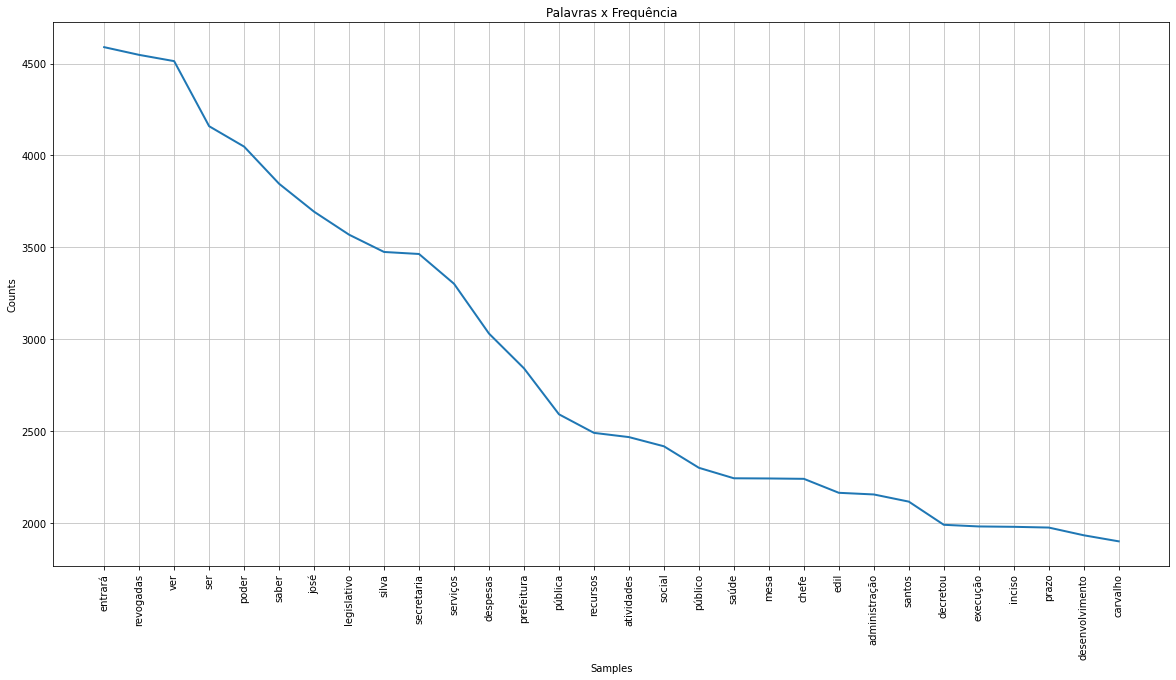

In [10]:
from nltk import FreqDist


plt.figure(figsize=(20,10))
fd = FreqDist(text)
fd.plot(30, title='Palavras x Frequência', cumulative=False)

## Analisando o resultado

O que esperava era obter palavras comuns no
texto das Leis que também descrevessem o conteúdo.

Existem algumas palavras descritivas do conteúdo,
por exemplo "revogadas", "secretaria", "serviços",
"despesas", "social", "saúde",
de certa forma descrevem o conteúdo das Leis.

Aparecem alguns nomes próprios, como "José",
"Silva", "Santos", "Carvalho". Nomes frequentes
na base de dados. Os nomes do prefeito em exercício,
do edil, presidente da câmara e outros cargos,
frequentemente aparecem no texto das Leis.
O que por exemplo explica os nomes José e Carvalho,
que aparecem no nome do prefeito José Ronaldo de Carvalho,
ganhador de 4 pleitos no município.

No entanto apenas estas palavras não dão uma boa
indicação sobre o conteúdo destas Leis. Por isso,
sugerimos no começo deste notebook algumas técnicas
para extração tópicos dos textos, bem como as 
palavras mais frequentes nestes tópicos.
Possivelmente este procedimento retornará um 
resultado mais interpretável.
